<a href="https://colab.research.google.com/github/suzuki-hikaru/ml-practice/blob/master/%E7%AC%AC3%E5%9B%9E%E8%AA%B2%E9%A1%8C_%E5%8F%82%E8%80%83_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3回課題_参考
- 決定木
- ランダムフォレスト
- AdaBoost

自分のgoogleドライブをマウント

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


決定木描写のためのライブラリをインストール

In [ ]:
!pip3 install pydotplus
!pip3 install graphviz
!pip3 install pyparsing

irisデータセットはscikit-learnにも用意されています。 sckit-learnのirisデータセットでは、クラスは0= Iris-Setosa、1 = Iris-Versicolor、2 = Iris-Virginicaのような整数ラベルに変換されています。

今回は可視化のためにIrisデータセットのうち、「がく片の長さ」と「花びらの長さ」の２つの特徴量のみを使用する。

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(iris['feature_names'])
print('Class labels:', np.unique(y))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class labels: [0 1 2]


用意したデータのうち、70%をトレーニングデータに、30%をテストデータへと分割する

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# 決定木

まず、散布図を描写するための関数plot_decision_regions()を定義する

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## 決定木の実施

## 決定木の主なパラメータ説明
- criterion = 'gini' or 'entropy' (default: 'gini')

> ピュアさの指標として、ジニ係数とエントロピーのどちらを利用するか


- max_depth = INT_VAL or None (default: None)

> 作成する決定木における最大の層の深さを定義

- min_samples_split = INT_VAL (default: 2)

> 枝の数の最小値

- min_samples_leaf = INT_VAL (default: 1)

> 1つのサンプルが属する葉の数の最小値

- min_weight_fraction_leaf = FLOAT_VAL (default: 0.0)

> 葉に属する必要のあるサンプルの割合の最小値を指定

- max_leaf_nodes = INT_VAL or None (default: None)

> 作成する葉の最大値

- class_weight = DICT, LIST_OF_DICTS, 'balanced', or None (default: None)

> 各説明変数に対する重み

デフォルト: 
`DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)`

 
 
[DecisionTreeClassifierの詳細](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

正解率: 0.9777777777777777
レポート:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


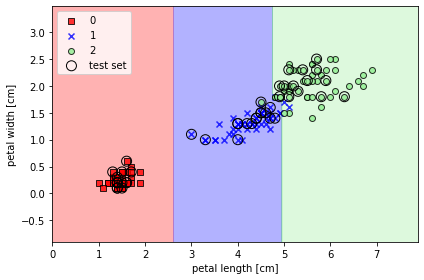

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
tree_clf.fit(X_train, y_train)

predict = tree_clf.predict(X_test)
ac_score_tree = metrics.accuracy_score(y_test,predict)
cl_report_tree = metrics.classification_report(y_test,predict)
print("正解率:" , ac_score_tree)
print("レポート:\n",cl_report_tree)


X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_clf, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

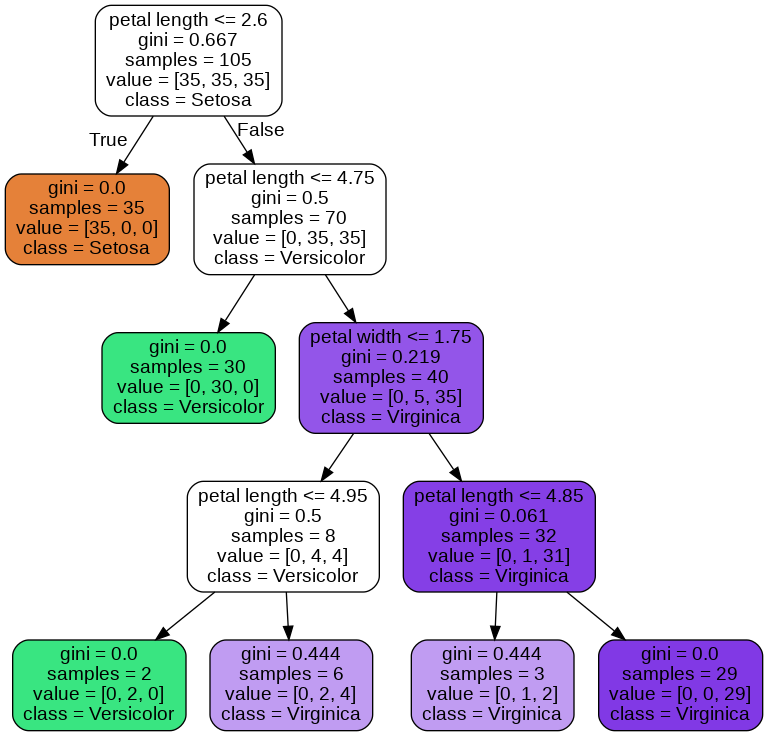

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
#%matplotlib inline
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree_clf,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file= '/content/gdrive/MyDrive/iris_model_tree.dot') 
graph = pydotplus.graph_from_dot_file(path= '/content/gdrive//MyDrive/iris_model_tree.dot')
graph.write_png('/content/gdrive//MyDrive/figure-decisionTree.png')
Image(graph.create_png())

## ランダムフォレストを使用した学習

### ランダムフォレストの実施

[RandomForestClassifierの詳細](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

####初期値
> RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)[source]¶

正解率: 0.9777777777777777
レポート:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


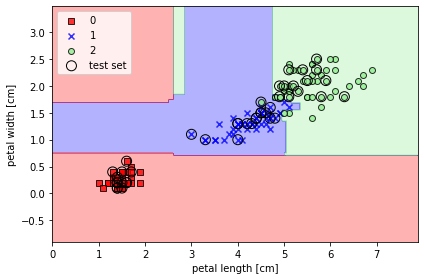

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(criterion='gini',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
forest_clf.fit(X_train, y_train)

estimator = forest_clf.estimators_[0]

predict_forest = forest_clf.predict(X_test)
ac_score_forest = metrics.accuracy_score(y_test,predict_forest)
cl_report_forest = metrics.classification_report(y_test,predict_forest)
print("正解率:" , ac_score_forest)
print("レポート:\n",cl_report_forest)


plot_decision_regions(X_combined, y_combined, 
                      classifier=forest_clf, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

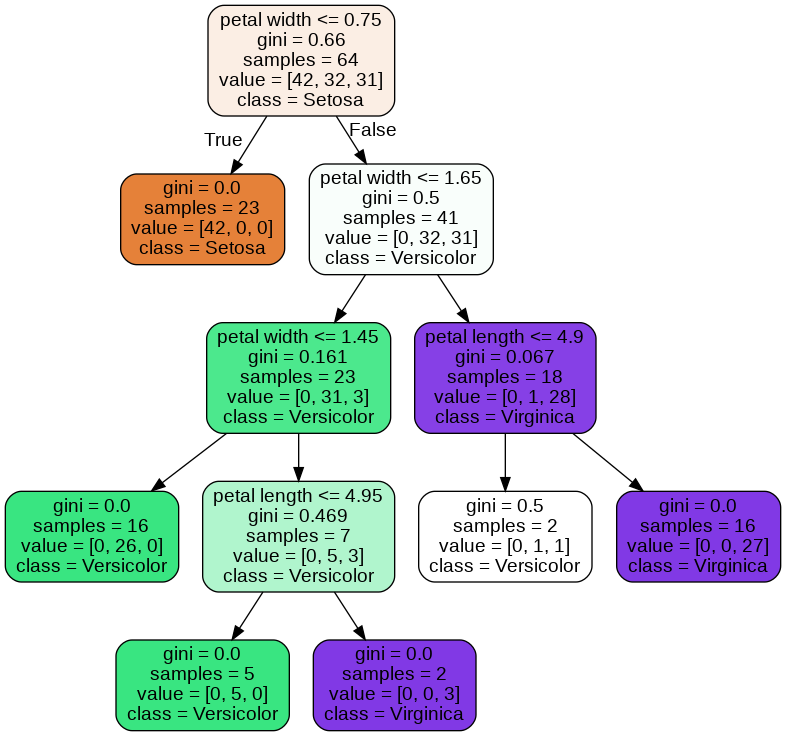

In [ ]:
dot_data = export_graphviz(estimator,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 'Versicolor','Virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file= '/content/gdrive/My Drive/iris_model_forest.dot') 
graph_forest = pydotplus.graph_from_dot_file(path= '/content/gdrive/My Drive/iris_model_forest.dot')
graph_forest.write_png('/content/gdrive/My Drive/figure-randomforest.png')
Image(graph_forest.create_png())

## AdaBoostを利用した学習

###  AdaBoostの実施
[sklearn - AdaBoostClassifierの詳細](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

#### 初期値
>AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

#### パラメーター
- base_estimator ： オブジェクト、オプション（デフォルト=なし）
ブーストされたアンサンブルが構築されるベース推定器。サンプルの重み付けのサポート、classes_および適切なn_classes_属性が必要 です。の場合None、ベース推定量はDecisionTreeClassifier(max_depth=1)

- n_estimators ： 整数、オプション（デフォルト= 50）
ブースティングが終了する推定器の最大数。完全に適合する場合、学習手順は早期に停止されます。

- learning_rate ： float、オプション（デフォルト= 1）
学習率は、各分類器の寄与をで縮小し learning_rateます。learning_rateとの間にはトレードオフがあり n_estimatorsます。

- algorithm ： {'SAMME'、 'SAMME.R'}、オプション（デフォルト= 'SAMME.R'）
「SAMME.R」の場合は、SAMME.Rリアルブースティングアルゴリズムを使用します。 base_estimatorクラス確率の計算をサポートする必要があります。「SAMME」の場合、SAMME離散ブーストアルゴリズムを使用します。通常、SAMME.RアルゴリズムはSAMMEよりも高速に収束し、ブーストの反復回数を減らしてテストエラーを低減します。

- random_state ： int、RandomStateインスタンスまたはNone、オプション（デフォルト= None）
intの場合、random_stateは乱数ジェネレーターが使用するシードです。RandomStateインスタンスの場合、random_stateは乱数ジェネレーターです。Noneの場合、乱数ジェネレーターはによって使用されるRandomStateインスタンスnp.randomです。

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=2,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.2,
                         random_state=1)

In [ ]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test 正解率: %.3f/%.3f'% (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test 正解率: %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test 正解率: 0.952/0.956
AdaBoost train/test 正解率: 0.990/0.978


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


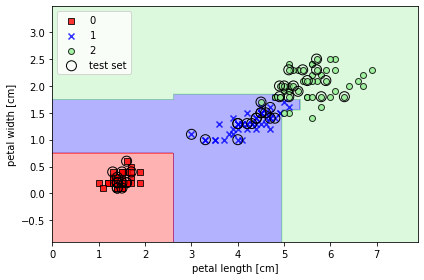

In [ ]:
plot_decision_regions(X_combined, y_combined, 
                      classifier=ada, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()